In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical


In [5]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values (0 to 1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape data to fit CNN input
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


In [6]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.1
)



Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 47s 111ms/step - accuracy: 0.9938 - loss: 0.0193 - val_accuracy: 0.9897 - val_loss: 0.0386
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 77s 100ms/step - accuracy: 0.9952 - loss: 0.0147 - val_accuracy: 0.9915 - val_loss: 0.0339
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 100ms/step - accuracy: 0.9955 - loss: 0.0129 - val_accuracy: 0.9893 - val_loss: 0.0373
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 43s 103ms/step - accuracy: 0.9968 - loss: 0.0094 - val_accuracy: 0.9907 - val_loss: 0.0395
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 100ms/step - accuracy: 0.9978 - loss: 0.0070 - val_accuracy: 0.9898 - val_loss: 0.0425


In [9]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9891 - loss: 0.0382
Test Accuracy: 0.9922


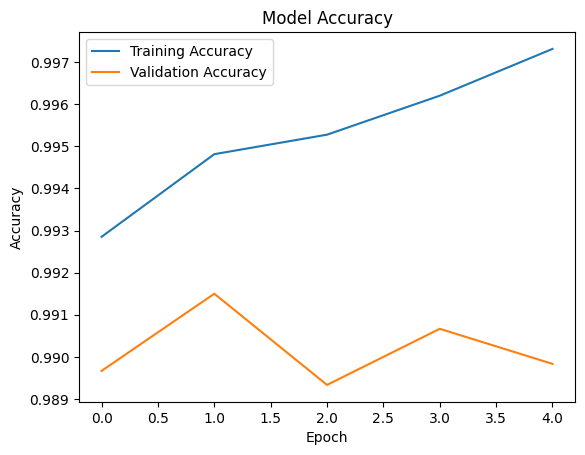

In [10]:
# Plot accuracy over epochs
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
